In [ ]:
#Khai bao thu vien
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler # chuan hoa du lieu
from keras.callbacks import ModelCheckpoint # luu lai huan luyen tot nhat
from tensorflow.keras.models import load_model #tai mo hinh

# Cac lop xay dung mo hinh
from keras.models import Sequential #dau vao
from keras.layers import LSTM #hoc phu thuoc
from keras.layers import Dropout # tranh hoc tu
from keras.layers import Dense # dau ra

#kiem tra do chinh xacs
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error # do sai so tuyet doi trung binh
from sklearn.metrics import mean_absolute_percentage_error #do phan tram sai so tuyet doi trung binh



In [ ]:
# import drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# doc du lieu


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data /data_cleaned_backup.csv')
df

,Date,Value
0,01/12/2022,17.780
1,02/12/2022,17.795
2,03/12/2022,17.655
3,04/12/2022,17.655
4,05/12/2022,17.640
...,...,...
188,09/06/2023,18.980
189,10/06/2023,19.025
190,11/06/2023,19.025
191,12/06/2023,19.640


In [ ]:
from pandas.io.sql import to_datetime
# dinh dang cau truc thoi gian
df["Date"] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [ ]:
#kich thuoc
df.shape

(193, 2)

In [ ]:
df.info()
# 1 cot ngay theo thoi gian, 1 cot so nguyen, k co gia tri trong

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    193 non-null    datetime64[ns]
 1   Value   193 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 KB


In [ ]:
df.describe()

,Value
count,193.000000
mean,17.464119
std,0.625489
min,15.940000
25%,17.005000
50%,17.490000
75%,17.925000
max,19.640000


In [ ]:
#lay data
df1= pd.DataFrame(df,columns=['Date','Value'])
# df1.index=df1['Date']
# df1.drop("Date",axis =1, inplace = True)

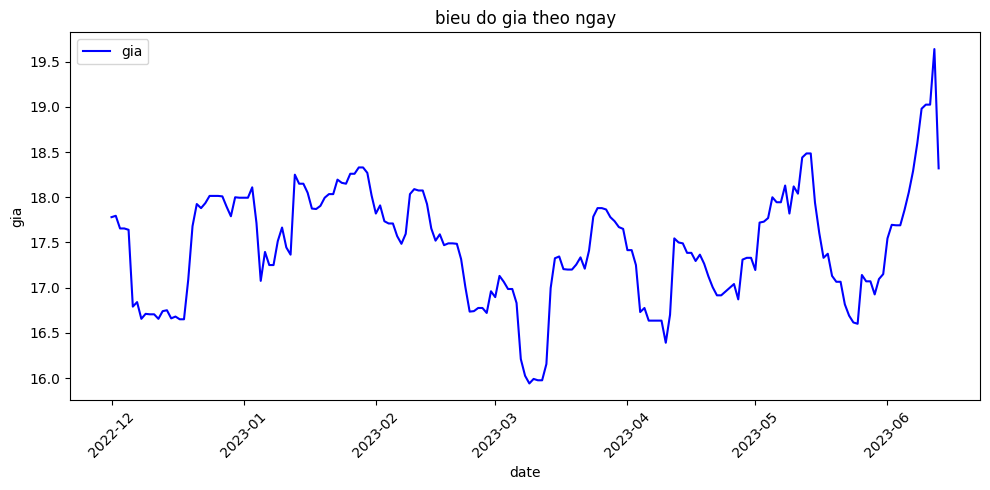

In [ ]:
#Ve bieu do
plt.figure(figsize = (10,5))
plt.plot(df1['Date'],df1['Value'], label='gia', color='blue')
plt.title('bieu do gia theo ngay')
plt.xlabel('date')
plt.ylabel('gia')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df1.index=df1['Date']
df1.drop("Date",axis =1, inplace = True)

In [ ]:
data=df1.values

train_data = data[:150] # 150 mau dau tien
test_data = data[150:]
data

array([[17.78 ],
       [17.795],
       [17.655],
       [17.655],
       [17.64 ],
       [16.79 ],
       [16.84 ],
       [16.655],
       [16.71 ],
       [16.705],
       [16.705],
       [16.655],
       [16.74 ],
       [16.75 ],
       [16.66 ],
       [16.68 ],
       [16.65 ],
       [16.65 ],
       [17.09 ],
       [17.68 ],
       [17.925],
       [17.88 ],
       [17.935],
       [18.015],
       [18.015],
       [18.015],
       [18.01 ],
       [17.895],
       [17.79 ],
       [18.   ],
       [17.995],
       [17.995],
       [17.995],
       [18.11 ],
       [17.715],
       [17.075],
       [17.395],
       [17.25 ],
       [17.25 ],
       [17.515],
       [17.665],
       [17.445],
       [17.365],
       [18.25 ],
       [18.15 ],
       [18.15 ],
       [18.05 ],
       [17.875],
       [17.87 ],
       [17.905],
       [17.995],
       [18.035],
       [18.035],
       [18.195],
       [18.16 ],
       [18.15 ],
       [18.26 ],
       [18.26 ],
       [18.33 

In [ ]:
#chuan hoa du lieu
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)

In [ ]:
# tao vong lap cac gia tri
x_train, y_train =[],[]
for i in range(20,len(train_data)):
    x_train.append(sc_train[i-20:i,0])
    y_train.append(sc_train[i,0])


In [ ]:
x_train
# mang gom gia cua 50 ngay

[array([0.4972973 , 0.50135135, 0.46351351, 0.46351351, 0.45945946,
        0.22972973, 0.24324324, 0.19324324, 0.20810811, 0.20675676,
        0.20675676, 0.19324324, 0.21621622, 0.21891892, 0.19459459,
        0.2       , 0.19189189, 0.19189189, 0.31081081, 0.47027027,
        0.53648649, 0.52432432, 0.53918919, 0.56081081, 0.56081081,
        0.56081081, 0.55945946, 0.52837838, 0.5       , 0.55675676,
        0.55540541, 0.55540541, 0.55540541, 0.58648649, 0.47972973,
        0.30675676, 0.39324324, 0.35405405, 0.35405405, 0.42567568,
        0.46621622, 0.40675676, 0.38513514, 0.62432432, 0.5972973 ,
        0.5972973 , 0.57027027, 0.52297297, 0.52162162, 0.53108108]),
 array([0.50135135, 0.46351351, 0.46351351, 0.45945946, 0.22972973,
        0.24324324, 0.19324324, 0.20810811, 0.20675676, 0.20675676,
        0.19324324, 0.21621622, 0.21891892, 0.19459459, 0.2       ,
        0.19189189, 0.19189189, 0.31081081, 0.47027027, 0.53648649,
        0.52432432, 0.53918919, 0.56081081, 0.

In [ ]:
y_train

[0.3771818871742987,
 0.343283582089553,
 0.3974196812547435,
 0.4986086516569701,
 0.5244118391095371,
 0.5244118391095371,
 0.5203642802934487,
 0.49734378952694147,
 0.4852011130786744,
 0.4677460156842912,
 0.46218062231216805,
 0.3986845433847712,
 0.3986845433847712,
 0.3541613964077923,
 0.21350872754869776,
 0.22565140399696482,
 0.18795851252213502,
 0.18795851252213502,
 0.18795851252213502,
 0.18795851252213502,
 0.1216797369086775,
 0.20541360991651914,
 0.43384771059954463,
 0.4217050341512776,
 0.4189223374652169,
 0.3905894257525935,
 0.3905894257525935,
 0.36630407285605937,
 0.3852770048064764,
 0.35820895522388074,
 0.32026309132304576,
 0.2878826207943339,
 0.2635972678977998,
 0.2635972678977998,
 0.2972426005565394,
 0.25145459144953275,
 0.3703516316721478,
 0.37566405261826485,
 0.37566405261826485,
 0.3392360232734637,
 0.481153554262586,
 0.4839362509486467,
 0.4945610928408808,
 0.5567923096382499,
 0.5418669365039213,
 0.5418669365039213,
 0.5919554768530233,

In [ ]:
# xep du lieu thanh 1 mang
x_train = np.array(x_train)
y_train = np.array(y_train)

#xep thanh mang 1 chieu
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

In [ ]:
x_train.shape
y_train.shape

(100, 1)

# Xay dung va huan luyen mo hinh

In [ ]:
model = Sequential()
model.add(LSTM(units=128, input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')
#su dung trinh toi uu hoa adam

In [ ]:
save_model="Notebooks/data/save_model.hdf5"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True, mode = 'auto')
model.fit(x_train,y_train,epochs=100, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.33487, saving model to Notebooks/data/save_model.hdf5
2/2 - 3s - loss: 0.3349 - 3s/epoch - 2s/step
Epoch 2/100

Epoch 2: loss improved from 0.33487 to 0.15279, saving model to Notebooks/data/save_model.hdf5
2/2 - 0s - loss: 0.1528 - 46ms/epoch - 23ms/step
Epoch 3/100

Epoch 3: loss did not improve from 0.15279
2/2 - 0s - loss: 0.2001 - 23ms/epoch - 11ms/step
Epoch 4/100

Epoch 4: loss improved from 0.15279 to 0.14073, saving model to Notebooks/data/save_model.hdf5
2/2 - 0s - loss: 0.1407 - 49ms/epoch - 25ms/step
Epoch 5/100

Epoch 5: loss improved from 0.14073 to 0.13873, saving model to Notebooks/data/save_model.hdf5
2/2 - 0s - loss: 0.1387 - 46ms/epoch - 23ms/step
Epoch 6/100

Epoch 6: loss did not improve from 0.13873
2/2 - 0s - loss: 0.1441 - 22ms/epoch - 11ms/step
Epoch 7/100

Epoch 7: loss improved from 0.13873 to 0.13459, saving model to Notebooks/data/save_model.hdf5
2/2 - 0s - loss: 0.1346 - 48ms/epoch - 24ms/step
Epoch 8/100



In [ ]:
# du lieu train
y_train = sc.inverse_transform(y_train) # gia thuc
final_model=load_model('Notebooks/data/save_model.hdf5')
y_train_predict = final_model.predict(x_train)
y_train_predict= sc.inverse_transform(y_train_predict) #gia du doan


4/4 [==============================] - 1s 6ms/step


#  Su dung mo hinh

In [ ]:
# xu ly du lieu test
test = df1[len(train_data)-20:].values
test = test.reshape(-1,1)
sc_test=sc.transform(test)

x_test =[]
for i in range(20,test.shape[0]):
    x_test.append(sc_test[i-20:i,0])
x_test=np.array(x_test)
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# du lieu test
y_test = data[150:]
y_test_predict= final_model.predict(x_test)
y_test_predict=sc.inverse_transform(y_test_predict)

2/2 [==============================] - 1s 10ms/step


In [ ]:
y_test_predict

array([[17.302996],
       [17.415913],
       [17.538246],
       [17.631203],
       [17.747757],
       [17.810326],
       [17.825296],
       [17.873686],
       [17.81623 ],
       [17.836847],
       [17.856163],
       [18.00308 ],
       [18.163391],
       [18.26744 ],
       [18.118458],
       [17.819323],
       [17.494223],
       [17.30029 ],
       [17.16465 ],
       [17.090406],
       [17.072527],
       [17.015623],
       [16.92772 ],
       [16.835732],
       [16.768463],
       [16.880749],
       [17.014812],
       [17.109426],
       [17.107563],
       [17.108904],
       [17.123606],
       [17.252441],
       [17.430077],
       [17.56225 ],
       [17.623531],
       [17.68228 ],
       [17.778015],
       [17.929462],
       [18.151056],
       [18.448608],
       [18.673859],
       [18.773233],
       [19.006796]], dtype=float32)

# Độ chính xác

<ipython-input-58-d081d1e61cb4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['du doan']= y_train_predict
<ipython-input-58-d081d1e61cb4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['du doan'] = y_test_predict


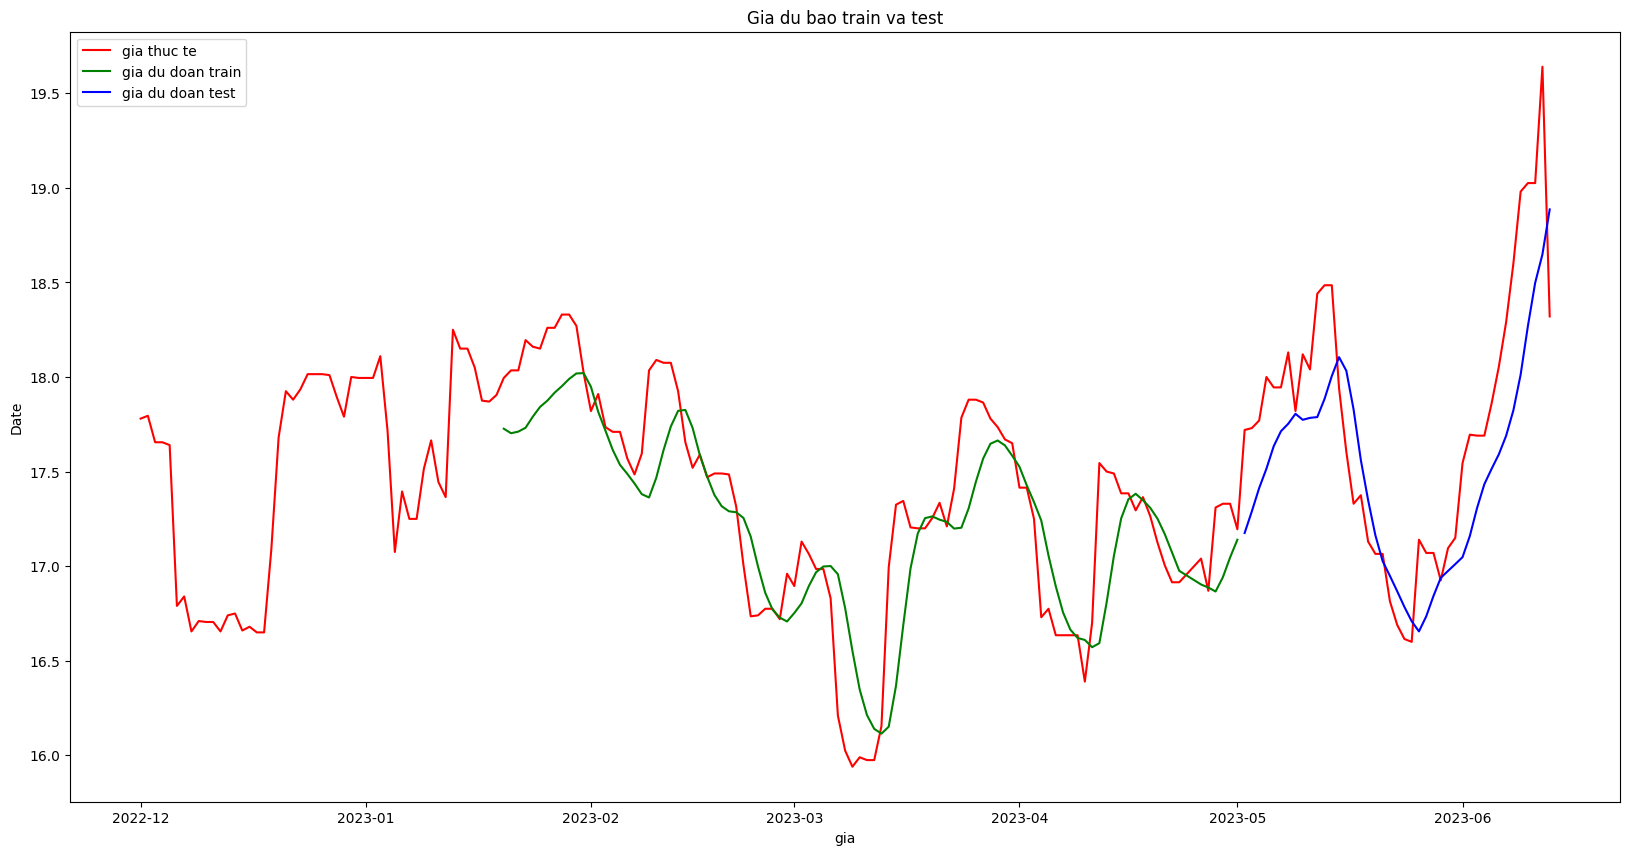

In [ ]:
#lap bieu do so sanh
train_data1 = df1[20:150]
test_data1 = df1[150:]

plt.figure(figsize=(20,10))
plt.plot(df1,label='gia thuc te',color = 'red') # gia thuc
train_data1['du doan']= y_train_predict
plt.plot(train_data1['du doan'], label='gia du doan train', color = 'green') #du bao train
test_data1['du doan'] = y_test_predict
plt.plot(test_data1['du doan'], label = 'gia du doan test', color = 'blue') #du bao test
plt.title('Gia du bao train va test')
plt.xlabel('gia')
plt.ylabel('Date')
plt.legend()
plt.show()

In [ ]:
print('do phu hop tap train', r2_score(y_train,y_train_predict)) #44%

print('Sai so tuyet doi trung binh tap train:', mean_absolute_error(y_train,y_train_predict))



do phu hop tap train 0.6799302662218144
Sai so tuyet doi trung binh tap train: 0.24023382034301755


In [ ]:
train_data1

,Value,du doan
Date,,
2022-12-21,17.925,17.167360
2022-12-22,17.880,17.522682
2022-12-23,17.935,17.758394
2022-12-24,18.015,17.864204
2022-12-25,18.015,17.893066
...,...,...
2023-04-27,16.870,16.978035
2023-04-28,17.310,16.973284
2023-04-29,17.330,17.085289


In [ ]:
print('do phu hop tap test', r2_score(y_test,y_test_predict)) #44%

print('Sai so tuyet doi trung binh tap train:', mean_absolute_error(y_test,y_test_predict))


do phu hop tap test 0.696792372864041
Sai so tuyet doi trung binh tap train: 0.3255829105820766


In [ ]:
test_data1


,Value,du doan
Date,,
2023-05-12,19701,18865.134766
2023-05-13,19749,18890.572266
2023-05-14,19749,18930.253906
2023-05-15,19167,18969.011719
2023-05-16,18809,18946.429688
2023-05-17,18515,18863.144531
2023-05-18,18563,18735.771484
2023-05-19,18302,18610.056641
2023-05-20,18232,18483.830078
